In [1]:
import random
import numpy as np
import warnings

import dataset
import taylor_spline

random.seed(0)
np.random.seed(0)
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

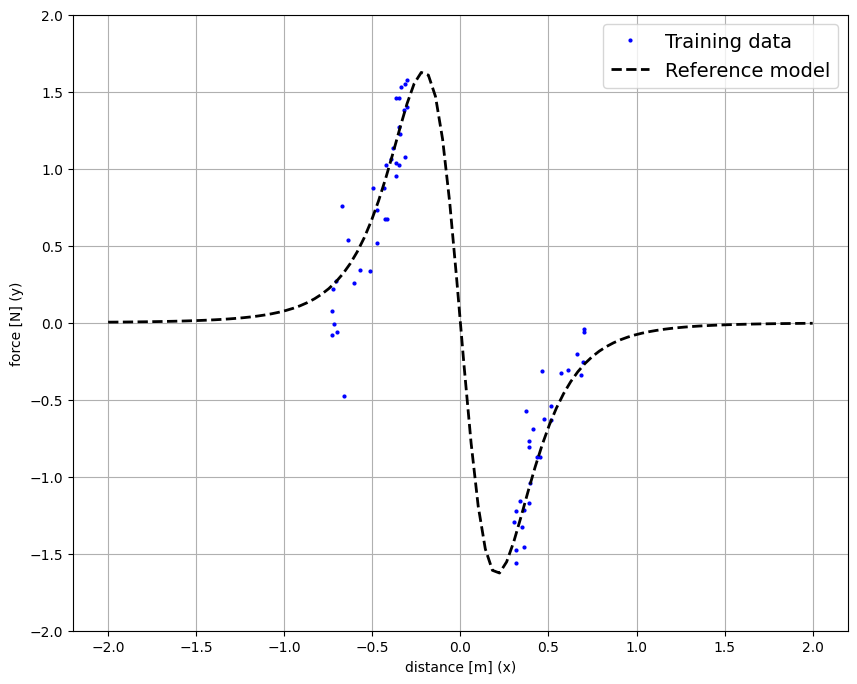

In [2]:
S = dataset.MagmanDatasetScaled()
#S.sample(size=500, noise=0.05)
S.load('data/magman.csv')
S.erase(-0.3, 0.3)
S.plot()

In [3]:
"""tspl = taylor_spline.TaylorSpline(0., 3, S.xl, S.xu)
tspl.fit(S)

print(f"Fitness: {tspl.fitness(S)}")
S.plot()
tspl.plot()"""

'tspl = taylor_spline.TaylorSpline(0., 3, S.xl, S.xu)\ntspl.fit(S)\n\nprint(f"Fitness: {tspl.fitness(S)}")\nS.plot()\ntspl.plot()'

'\nprev_drawings = []\n@widgets.interact(x0=(.0, 10.0, 0.01), deg=(0, 10, 1), exp_cov=(0.01, 0.5, 0.01))\ndef update(x0=0., deg=4, exp_cov=0.2):\n    global prev_drawings\n\n    tspline_fitter = taylor_spline.TaylorSplineEstimator()\n    tspline = tspline_fitter.fit(S, deg, silent=True, x0=x0, exp_cov=exp_cov)\n\n    for d in prev_drawings: d.remove()\n    prev_drawings = []\n    \n    print(f"Fitness: {tspline.fitness(S)}")\n    prev_drawings += tspline.plot(show=False)\n'

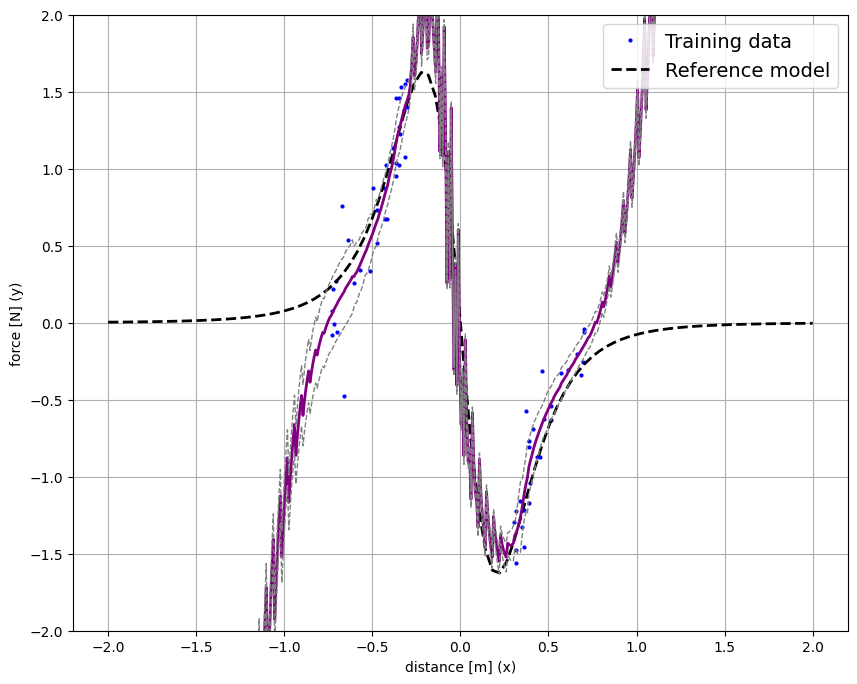

In [4]:
#%matplotlib widget
#import ipywidgets as widgets

X = None
Y = None
LB = None
UB = None

def smooth(exp_cov=0.3):
    global X, Y, LB, UB

    S.plot()

    def func(x):
        y = []
        y_lb = []
        y_ub = []
        for __x in x:
            tspline_est = taylor_spline.TaylorSplineEstimator()
            tspline = tspline_est.fit(S, 2, silent=True, x0=__x, exp_cov=exp_cov)
            lb, ub = tspline_est.get_bounds(S, tspline)

            y.append(tspline.y(__x))
            y_lb.append(lb)
            y_ub.append(ub)

        return y, y_lb, y_ub

    X = np.linspace(S.xl, S.xu, 500)
    Y, LB, UB = func(X)
    plt.plot(X, Y, linestyle='solid', linewidth=2, color='purple', label='Model')
    plt.plot(X, LB, linestyle='dashed', linewidth=1, color='gray', label='Lower Bound')
    plt.plot(X, UB, linestyle='dashed', linewidth=1, color='gray', label='Upper Bound')

smooth()

"""
prev_drawings = []
@widgets.interact(x0=(.0, 10.0, 0.01), deg=(0, 10, 1), exp_cov=(0.01, 0.5, 0.01))
def update(x0=0., deg=4, exp_cov=0.2):
    global prev_drawings

    tspline_fitter = taylor_spline.TaylorSplineEstimator()
    tspline = tspline_fitter.fit(S, deg, silent=True, x0=x0, exp_cov=exp_cov)

    for d in prev_drawings: d.remove()
    prev_drawings = []
    
    print(f"Fitness: {tspline.fitness(S)}")
    prev_drawings += tspline.plot(show=False)
"""

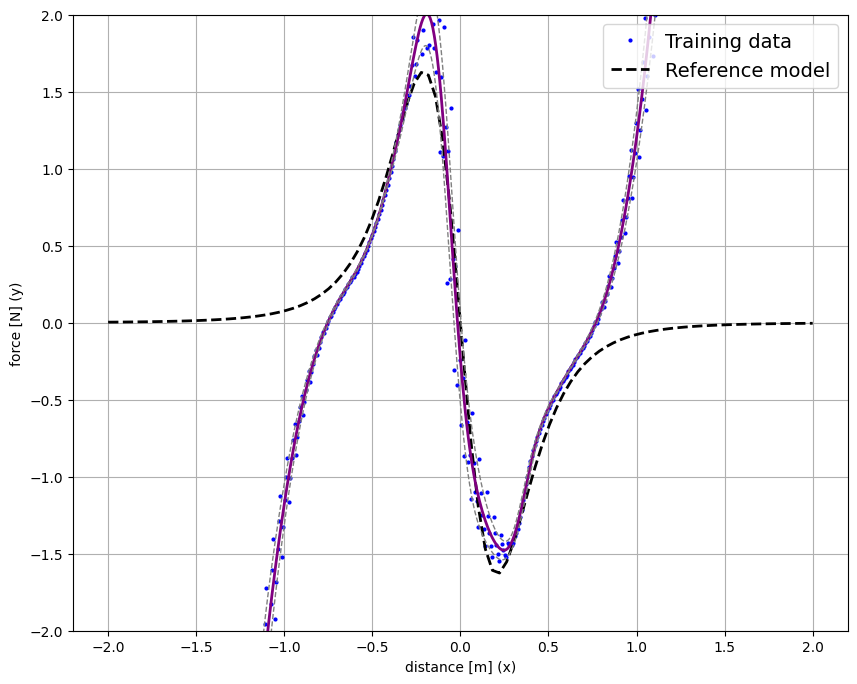

In [5]:
S.clear()

for i in range(len(X)):
    sigma = 0 #(UB[i] - LB[i]) / 2
    dp = dataset.DataPoint(X[i], random.gauss(Y[i], sigma))
    S.data.append(dp)

smooth(exp_cov=0.1)